### Manuel Ibañez

In [36]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 4.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/10.7 MB 7.6 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.7 MB 8.3 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 9.5 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.4 MB 9.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.4 MB 10.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/38.4 MB 10.2 MB/s eta 0:00:04
   -------- ------------------------------- 8.4/38.4 MB 10.3 MB/s eta 0:00:03
   -----

In [ ]:
import pandas as pd  # For data manipulation and analysis (Pandas DataFrames)
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and data visualization
import seaborn as sns  # For advanced statistical data visualization

from sklearn.cluster import KMeans  # For performing KMeans clustering

In [ ]:
df = pd.read_csv('clustering-lab-ManuelSalazar0119/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.drop(columns='CustomerID', inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

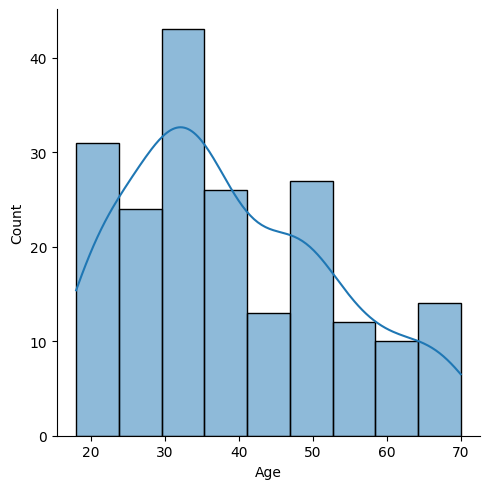

In [16]:
sns.displot(x='Age', data=df, kde=True)

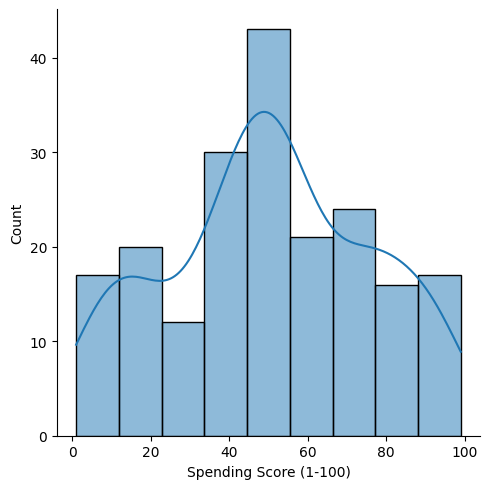

In [18]:
sns.displot(x='Spending Score (1-100)', data=df, kde=True)

<Axes: xlabel='Gender', ylabel='count'>

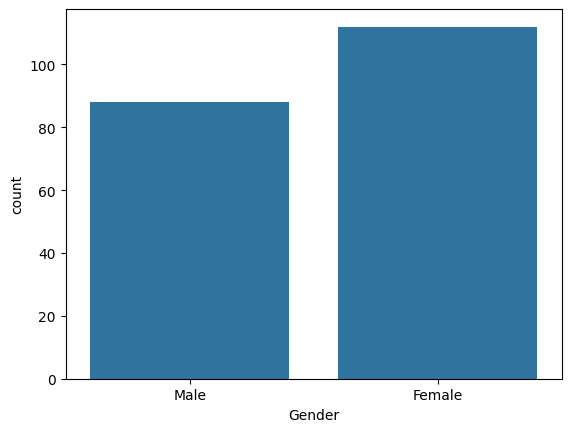

In [19]:
sns.countplot(x='Gender', data=df)

In [23]:
df = pd.get_dummies(df).reset_index(drop=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


<Axes: >

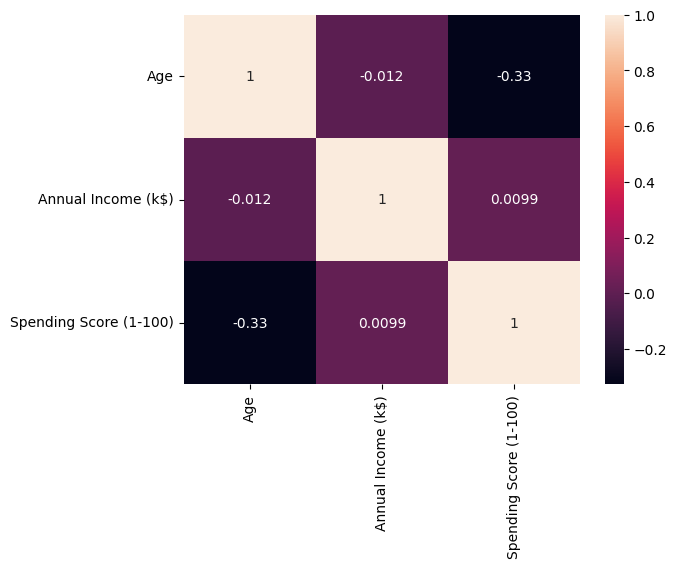

In [27]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

#### KMeans Implementation

In [29]:
x= df.iloc[:,].values
x

array([[19, 15, 39, False, True],
       [21, 15, 81, False, True],
       [20, 16, 6, True, False],
       [23, 16, 77, True, False],
       [31, 17, 40, True, False],
       [22, 17, 76, True, False],
       [35, 18, 6, True, False],
       [23, 18, 94, True, False],
       [64, 19, 3, False, True],
       [30, 19, 72, True, False],
       [67, 19, 14, False, True],
       [35, 19, 99, True, False],
       [58, 20, 15, True, False],
       [24, 20, 77, True, False],
       [37, 20, 13, False, True],
       [22, 20, 79, False, True],
       [35, 21, 35, True, False],
       [20, 21, 66, False, True],
       [52, 23, 29, False, True],
       [35, 23, 98, True, False],
       [35, 24, 35, False, True],
       [25, 24, 73, False, True],
       [46, 25, 5, True, False],
       [31, 25, 73, False, True],
       [54, 28, 14, True, False],
       [29, 28, 82, False, True],
       [45, 28, 32, True, False],
       [35, 28, 61, False, True],
       [40, 29, 31, True, False],
       [23, 29, 87

##### Elbow Method

Text(0, 0.5, 'WCSS')

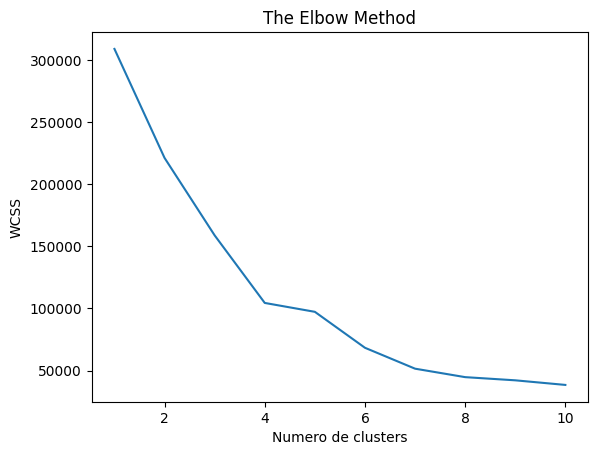

In [40]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

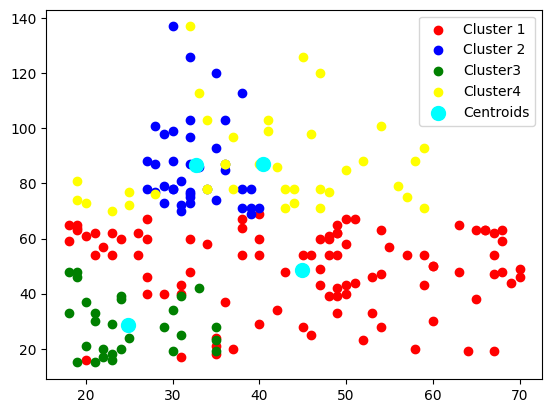

In [43]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2, 1], c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.legend()

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [45]:
dbscan = DBSCAN(eps=0.9, min_samples=3)
y_dbscan = dbscan.fit_predict(x_scaled)

In [ ]:
plt.scatter(x_scaled[y_dbscan == 0, 0], x_scaled)

In [11]:
# Cargar datos
df_mall = pd.read_csv('clustering-lab-ManuelSalazar0119/Mall_Customers.csv')

# Mostrar estructura
print(f"Filas: {df_mall.shape[0]}, Columnas: {df_mall.shape[1]}")
print("\nPrimeras filas:")
display(df_mall.head())

# Verificar nulos
print("\nValores nulos por columna:")
print(df_mall.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df_mall.describe())

Filas: 200, Columnas: 5

Primeras filas:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Estadísticas descriptivas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000
